# Model

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "IBM Plex Serif"

Using the functions from [Waks et al_2002_Security aspects of quantum key distribution with sub-Poisson light](https://link.aps.org/doi/10.1103/PhysRevA.66.042315). The paper investigates quantum key distribution with sub-Poisson light sources. For the model constructed in this notebook equations 5-9.

The disturbance measure inroduces $p_{err}$ and $p_{d}$ which are the probabilities that the pulse causes and error and the decetion of a multiphoton even respectively. The probability that a pulse results in a click at the detector is given by $p_{click}$. The disturbance error reads as 

$$
\epsilon = \frac{p_{err} + p_{d}/2}{p_{click}}.
$$

In [54]:
def error_rate(pol_err, multi_err, prob_click):
    """
    error rate 
    """
    return (pol_err + (multi_err/2))/prob_click

In the limit where there are negligable errors from multiphoton events, the disturbance measure can be assumed to just be the bit error rate of transmission. Now $\epsilon = e$. An additional parameter $\beta$ defines the fraction of events that originated from a the tranmission of a single photon. If $p_m$ is the probability that the photon source emitted more than one photon the parameter is given by 
$$
\beta = \frac{p_{click} - p_m}{p_{click}}.
$$

To account for Eve's attacks a compression function is defined which  is a function of the $\beta$ parameter and the error rate
$$
\tau(e) = -\log_{2} [ \frac{1}{2} + 2 \frac{e}{\beta} - 2 (\frac{e}{\beta})^2 ]
$$

In [55]:
def BETA(prob_click, multi_err):
    """
    """
    return (prob_click - multi_err)/prob_click

def compression_function(pol_err, multi_err, prob_click):
    """
    compression funtion defined above also containing the function Beta
    """
    
    _error_rate = error_rate(pol_err, multi_err, prob_click)
    _beta = BETA(prob_click, multi_err)
    
    return -np.log(0.5 + 2*_error_rate/_beta - 2*(_error_rate/_beta)**2)

Finally the Shannon entropy is defined as $$h(e) = -e\log_{2}e -  (1-e)\log_{2}(1-e)$$

/var/folders/69/6w_l7snx2337833ct5yy0bn00000gn/T/ipykernel_7020/1289446460.py:6: RuntimeWarning: divide by zero encountered in log2
  return -x*np.log2(x)-((1-x)*np.log2(1-x))
/var/folders/69/6w_l7snx2337833ct5yy0bn00000gn/T/ipykernel_7020/1289446460.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return -x*np.log2(x)-((1-x)*np.log2(1-x))


Text(0, 0.5, 'h(x)')

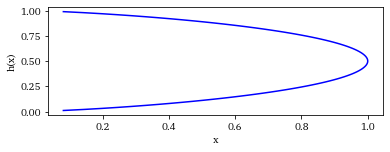

In [56]:
def binary_entropy(x):
    """ 
    calculate the binary entropy of x
    x: np.array containing values between 0 and 1
    """
    return -x*np.log2(x)-((1-x)*np.log2(1-x))

iter = np.linspace(0,1,100)
vals = [binary_entropy(i) for i in iter]
plt.figure(figsize=(6,2))
plt.plot(vals, iter, 'b')
plt.xlabel('x')
plt.ylabel('h(x)')

Evaluation of the above function with zero error rate results in a non-physical result due to the asymptotic and non continuous nature of the function, see the figure above. Finally the key rate is given by the expression
$$
R = \frac{p_{click}}{2}(\beta \tau(e) - f(e)h(e))).
$$

In [57]:
def BB84rate(pol_err, multi_err, prob_click):
    """
    rate, neglecting photon statistics and assuming error correction on the shannon limit, f(e) = 1
    """

    if pol_err == 0:
        pol_err = 0.0000000000000001

    _comp_func = compression_function(pol_err, multi_err, prob_click)
    _beta = BETA(prob_click, multi_err)

    return (prob_click/2) * _beta * _comp_func - binary_entropy(error_rate(pol_err, multi_err, prob_click))

## Simulation

Taking the polarisation error rate to be anywhere between ~0% and 5%, assuming perfect single photons arriving at the detectors and further assuming perfect detection. The first figure is the key rate purely as a function of polarisation error. The second figure is the ratio of key rate when polarisation errors are present to an ideal key rate. 

Text(0, 0.5, 'Key Rate')

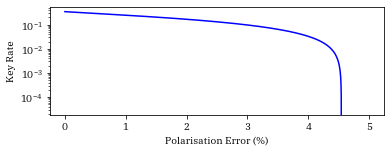

In [67]:
multi_emission_error = 0
prob_click = 1

pol_error = np.linspace(5, 0, 10000)
rate = [BB84rate(it/100, multi_emission_error, prob_click) for it in pol_error]

plt.figure(figsize=(6,2))
fig = plt.plot(pol_error, rate, 'b')

plt.yscale('log')
plt.xlabel('Polarisation Error (%)')
plt.ylabel('Key Rate')

# plt.savefig('boo.png', dpi=500, bbox_inches='tight')

Text(0, 0.5, 'Fraction of key from an ideal key')

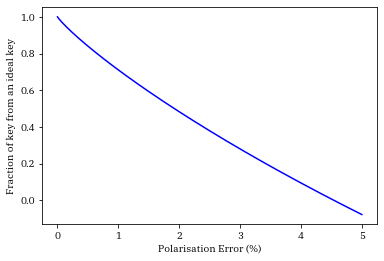

In [68]:
ratio = [BB84rate(it/100, multi_emission_error, prob_click)/BB84rate(0, multi_emission_error, prob_click) for it in pol_error]

plt.figure(figsize=(6,4))
fig = plt.plot(pol_error, ratio, 'b')

plt.xlabel('Polarisation Error (%)')
plt.ylabel('Fraction of key from an ideal key')

# plt.savefig('boo boo.png', dpi=500, bbox_inches='tight')

### Adding further functionality to this code

By including photon number statistics, dark counts and losses (which also account for non-ideal detection efficiency) we can get a much better understanding of how the polarisation error will affect the key rate as a function of a satellite overpass.